In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [2]:
df = pd.read_csv("US_Accidents_March23.csv")
print("Dataset Shape:", df.shape)
df.head()

C:\Users\Samosa\AppData\Local\Temp\ipykernel_15968\4108997531.py:1: DtypeWarning: Columns (29,30,31,32,33,34,35,36,37,38,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("US_Accidents_March23.csv")


Dataset Shape: (2155160, 46)


,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155160 entries, 0 to 2155159
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [4]:
# Check missing values
df.isnull().sum().sort_values(ascending=False).head(10)

End_Lng              2155160
End_Lat              2155160
Precipitation(in)     521824
Wind_Chill(F)         488210
Wind_Speed(mph)       124889
Visibility(mi)         38632
Wind_Direction         38085
Humidity(%)            37443
Weather_Condition      37351
Temperature(F)         34539
dtype: int64

In [8]:
cols_to_drop = ['End_Lat', 'End_Lng', 'Description', 'Number']
df.drop(columns=[col for col in cols_to_drop if col in df.columns], inplace=True)

In [9]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['Hour'] = df['Start_Time'].dt.hour
df['Day'] = df['Start_Time'].dt.day_name()
df['Month'] = df['Start_Time'].dt.month

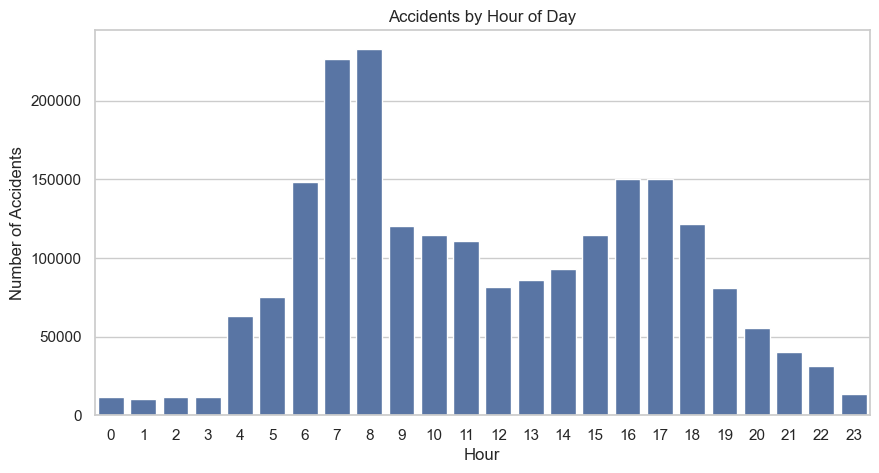

In [10]:
plt.figure(figsize=(10,5))
sns.countplot(x='Hour', data=df)
plt.title("Accidents by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Number of Accidents")
plt.show()

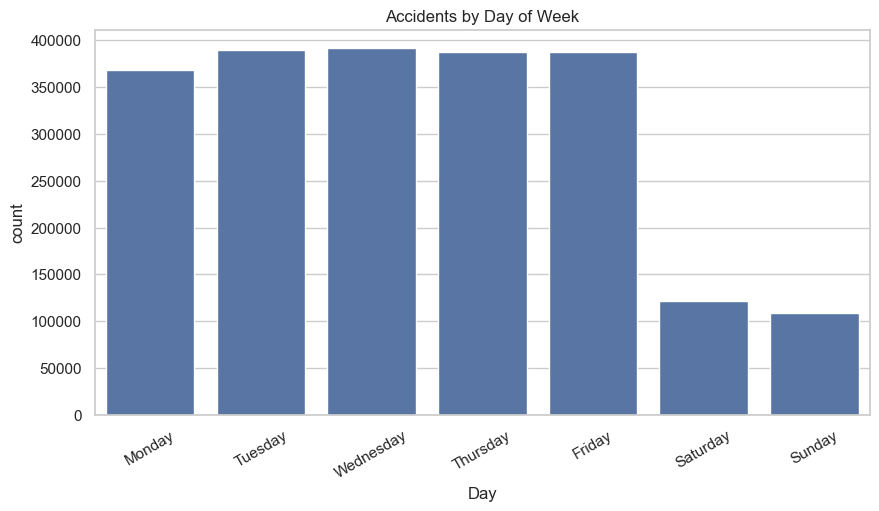

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(x='Day', data=df,
              order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title("Accidents by Day of Week")
plt.xticks(rotation=30)
plt.show()

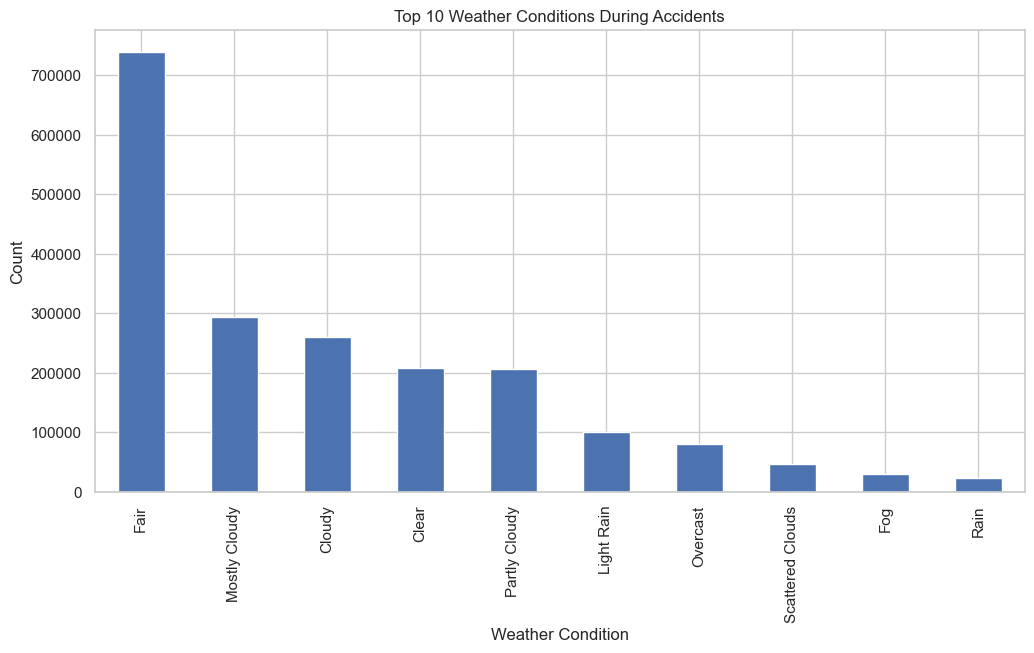

In [12]:
plt.figure(figsize=(12,6))
df['Weather_Condition'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Weather Conditions During Accidents")
plt.xlabel("Weather Condition")
plt.ylabel("Count")
plt.show()

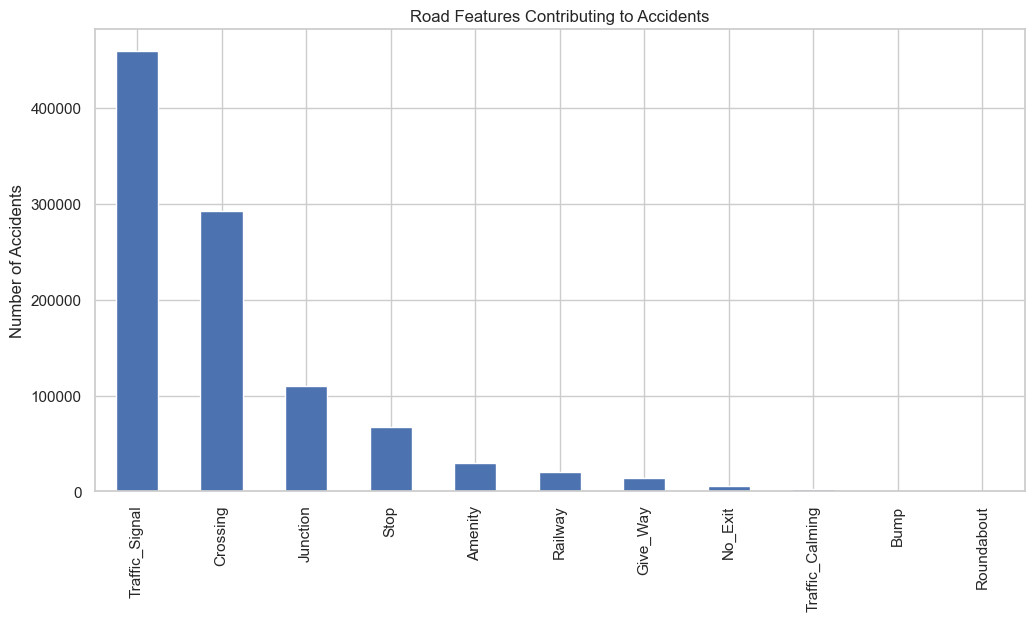

In [13]:
road_features = [
    'Amenity','Bump','Crossing','Give_Way','Junction',
    'No_Exit','Railway','Roundabout','Stop',
    'Traffic_Calming','Traffic_Signal'
]

plt.figure(figsize=(12,6))
df[road_features].sum().sort_values(ascending=False).plot(kind='bar')
plt.title("Road Features Contributing to Accidents")
plt.ylabel("Number of Accidents")
plt.show()

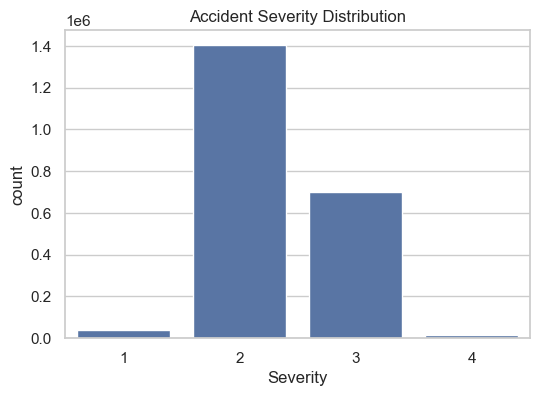

In [14]:
plt.figure(figsize=(6,4))
sns.countplot(x='Severity', data=df)
plt.title("Accident Severity Distribution")
plt.show()

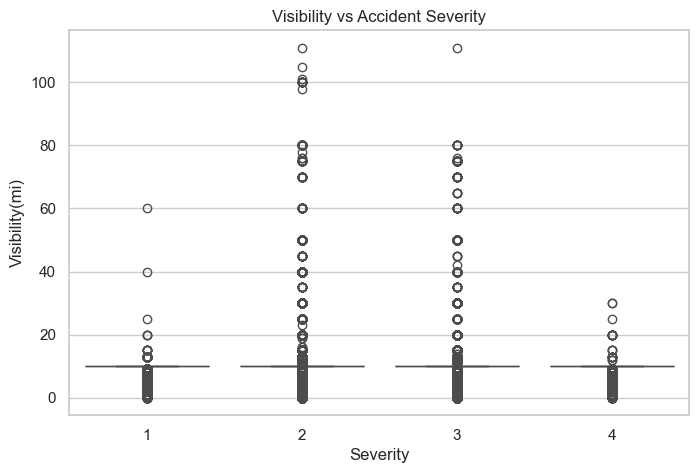

In [15]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Severity', y='Visibility(mi)', data=df)
plt.title("Visibility vs Accident Severity")
plt.show()

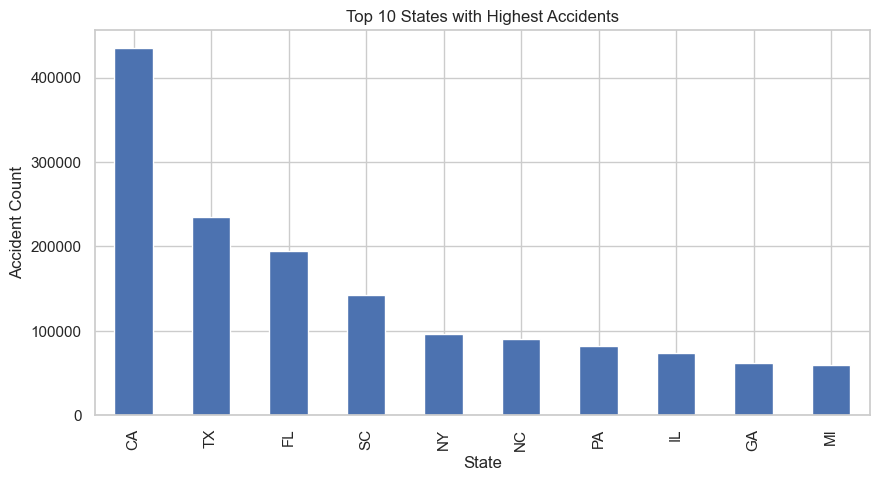

In [16]:
plt.figure(figsize=(10,5))
df['State'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 States with Highest Accidents")
plt.xlabel("State")
plt.ylabel("Accident Count")
plt.show()

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['Temperature(F)'], bins=30, kde=True)
plt.title("Temperature Distribution During Accidents")
plt.show()

In [18]:
print("""
Key Insights:
- Accidents peak during morning and evening rush hours.
- Most accidents occur under clear or cloudy weather.
- Traffic signals and junctions are major accident hotspots.
- Lower visibility often correlates with higher severity.
- Certain states consistently show higher accident counts.
""")


Key Insights:
- Accidents peak during morning and evening rush hours.
- Most accidents occur under clear or cloudy weather.
- Traffic signals and junctions are major accident hotspots.
- Lower visibility often correlates with higher severity.
- Certain states consistently show higher accident counts.

